In [1]:
import pandas as pd
import numpy as np


df_heart = pd.read_csv('heart.csv')

df_heart.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [2]:
print("data null \n",df_heart.isnull().sum())
print("data kosong \n",df_heart.empty)
print("data nan \n",df_heart.isna().sum())

data null 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
data kosong 
 False
data nan 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X=df_heart.drop(columns=['HeartDisease'],axis=1)
y=df_heart.HeartDisease



X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=5)
print(X_train.shape)
print(X_test.shape)

(734, 11)
(184, 11)


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols=['Sex', 'ChestPainType', 'RestingECG',
          'ExerciseAngina', 'ST_Slope']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols),
    remainder='passthrough'
)

X_train_enc = transformer.fit_transform(X_train)
X_test_enc= transformer.transform(X_test)


X_column = df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,onehotencoder__Sex_F,onehotencoder__Sex_M,onehotencoder__ChestPainType_ASY,onehotencoder__ChestPainType_ATA,onehotencoder__ChestPainType_NAP,onehotencoder__ChestPainType_TA,onehotencoder__RestingECG_LVH,onehotencoder__RestingECG_Normal,onehotencoder__RestingECG_ST,onehotencoder__ExerciseAngina_N,onehotencoder__ExerciseAngina_Y,onehotencoder__ST_Slope_Down,onehotencoder__ST_Slope_Flat,onehotencoder__ST_Slope_Up,remainder__Age,remainder__RestingBP,remainder__Cholesterol,remainder__FastingBS,remainder__MaxHR,remainder__Oldpeak
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,41.0,120.0,336.0,0.0,118.0,3.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,48.0,100.0,159.0,0.0,100.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,60.0,130.0,0.0,1.0,130.0,1.1
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,63.0,140.0,260.0,0.0,112.0,3.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,42.0,120.0,240.0,1.0,194.0,0.8
5,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,37.0,130.0,315.0,0.0,158.0,0.0
6,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,65.0,140.0,252.0,0.0,135.0,0.3
7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,62.0,158.0,210.0,1.0,112.0,3.0
8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,41.0,120.0,295.0,0.0,170.0,0.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,49.0,100.0,253.0,0.0,174.0,0.0


In [5]:
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.feature_selection import SelectPercentile,RFE

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV,StratifiedKFold

import matplotlib.pyplot as plt


In [6]:

from sklearn.svm import SVC

pipe_SVC = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('feat_select',SelectPercentile()),
    ('clf',SVC(class_weight='balanced'))
    ])

param_grid_SVC = [
    {'feat_select__percentile': [0.3,0.5],
     'clf__kernel': ['poly','rbf'],
     'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
      'feat_select' : [RFE(estimator=DecisionTreeClassifier(random_state=5),n_features_to_select=3,step=1)],
      'clf__kernel': ['poly','rbf'],
      'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],
      'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]
    }
]

GSCV_SVC = GridSearchCV(pipe_SVC, param_grid_SVC, cv=StratifiedKFold(n_splits=5))
GSCV_SVC.fit(X_train_enc, y_train)

mask = GSCV_SVC.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_SVC.best_estimator_))
print("Selected features:{}".format(X_column.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_SVC.best_score_))
print("Test set score: {:.2f}".format(GSCV_SVC.score(X_test_enc,y_test)))

Best model:Pipeline(steps=[('scale', StandardScaler()),
                ('feat_select',
                 RFE(estimator=DecisionTreeClassifier(random_state=5),
                     n_features_to_select=3)),
                ('clf', SVC(C=1, class_weight='balanced'))])
Selected features:Index(['onehotencoder__ST_Slope_Up', 'remainder__Cholesterol',
       'remainder__MaxHR'],
      dtype='object')
Best CV score: 0.83
Test set score: 0.87


 Confusion matrix SVC:
  [[ 58  15]
 [  9 102]]
 Classification report SVC:
                precision    recall  f1-score   support

           0       0.87      0.79      0.83        73
           1       0.87      0.92      0.89       111

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.87      0.87       184



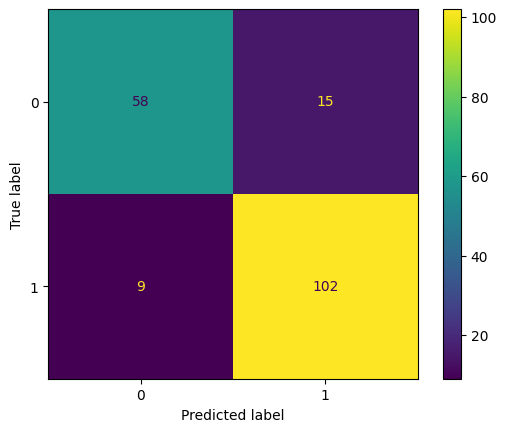

In [7]:
pred = GSCV_SVC.predict(X_test_enc)
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GSCV_SVC.classes_)
                             
print(" Confusion matrix SVC:\n ",cm)
print(" Classification report SVC:\n ",classification_report(y_test,pred,zero_division=0))

disp.plot()
plt.show()

In [8]:


from sklearn.ensemble import RandomForestClassifier

pipe_RF = Pipeline(steps=[
    ('feat_select',SelectKBest()),
    ('clf',RandomForestClassifier(random_state=5))])

param_grid_RF = [
    {'feat_select__k': np.arange(1,4),
     'clf__n_estimators': [50,100,150,200,250],
     'clf__max_depth': [2,3,4,5,6,7],
     'clf__criterion': ['gini', 'entropy']
    },
    {
      'feat_select' : [SelectFromModel(estimator=DecisionTreeClassifier(random_state=0),max_features=4)],
      'clf__n_estimators': [50,100,150,200,250],
      'clf__max_depth': [2,3,4,5,6,7],
      'clf__criterion': ['gini', 'entropy']
    }
]

GSCV_RF = GridSearchCV(pipe_RF, param_grid_RF, cv=StratifiedKFold(n_splits=5))
GSCV_RF.fit(X_train_enc, y_train)

mask = GSCV_RF.best_estimator_.named_steps['feat_select'].get_support()

print("Best model:{}".format(GSCV_RF.best_estimator_))
print("Selected features:{}".format(X_column.columns[mask]))

print("Best CV score: {:.2f}".format(GSCV_RF.best_score_))
print("Test set score: {:.2f}".format(GSCV_RF.score(X_test_enc,y_test)))

Best model:Pipeline(steps=[('feat_select',
                 SelectFromModel(estimator=DecisionTreeClassifier(random_state=0),
                                 max_features=4)),
                ('clf',
                 RandomForestClassifier(max_depth=3, n_estimators=250,
                                        random_state=5))])
Selected features:Index(['onehotencoder__ChestPainType_ASY', 'onehotencoder__ST_Slope_Up',
       'remainder__MaxHR', 'remainder__Oldpeak'],
      dtype='object')
Best CV score: 0.84
Test set score: 0.86


 Confusion matrix RF:
  [[62 11]
 [15 96]]
 Classification report RF:
                precision    recall  f1-score   support

           0       0.81      0.85      0.83        73
           1       0.90      0.86      0.88       111

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.86      0.86       184



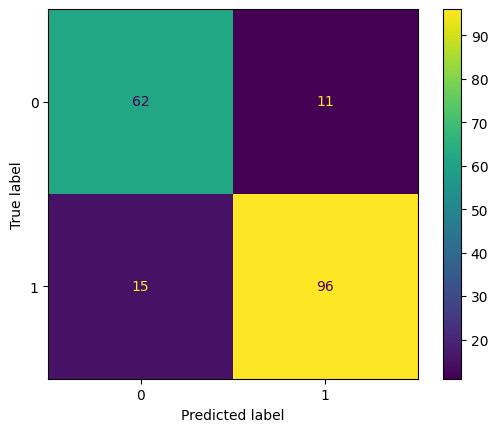

In [9]:
pred = GSCV_RF.predict(X_test_enc)
cm = confusion_matrix(y_test,pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=GSCV_RF.classes_)

print(" Confusion matrix RF:\n ",confusion_matrix(y_test,pred))
print(" Classification report RF:\n ",classification_report(y_test,pred,zero_division=0))

disp.plot()
plt.show()